In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Mayank.Yogi\Desktop\Data Trained\FlipRobo\Time series tutorial\Arima model prediction\Company Stock and Investment.csv",squeeze=True,parse_dates=True,index_col=[0])
df.head()

,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
Date,,,,
2009-12-31,0.025417,0.000150,0.017354,0.006848
2010-04-01,0.026830,0.001097,0.015565,-0.004609
2010-05-01,0.002699,0.001560,0.001729,0.005900
2010-06-01,0.021688,0.006009,-0.015906,-0.018116
2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [3]:
df_oil = df[['Oil Investments']]
df_oil.head()

,Oil Investments
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256


In [4]:
df_oil.isnull().sum()

Oil Investments    0
dtype: int64

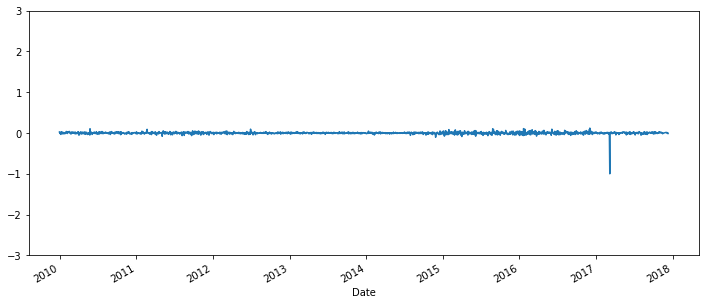

In [5]:
plt.ylim(-3,3)
df_oil['Oil Investments'].plot(figsize=(12,5))

In [7]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df_oil['Oil Investments'])

1. ADF :  -45.94216292983992
2. P-Value :  0.0
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 1983
5. Critical Values :
	 1% :  -3.4336519592295947
	 5% :  -2.862998620943585
	 10% :  -2.567546508593341


In [8]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_oil['Oil Investments'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-8161.687, Time=1.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-8167.333, Time=0.42 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-8167.305, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-8167.326, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-8168.938, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-8165.413, Time=0.94 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 3.752 seconds


In [34]:
print(df_oil.shape)
train = df_oil['2009-12-31':'2014-12-31']
test = df_oil['2015-01-01':]
print(train.shape,test.shape)

(1984, 2)
(1259, 2) (725, 2)


In [35]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Oil Investments'],order=(1,0,3))
model=model.fit()
model.summary()

D:\Python\Anaconda2\envs\Virtual\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Python\Anaconda2\envs\Virtual\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:        Oil Investments   No. Observations:                 1259
Model:                     ARMA(1, 3)   Log Likelihood                3325.694
Method:                       css-mle   S.D. of innovations              0.017
Date:                Mon, 19 Oct 2020   AIC                          -6639.387
Time:                        10:52:27   BIC                          -6608.559
Sample:                             0   HQIC                         -6627.802
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0001      0.000     -0.283      0.777      -0.001       0.001
ar.L1.Oil Investments     0.2998      1.711      0.175      0.861      -3.053       3.653
ma.L1.Oil Investments    -0.3348      1.711     -0.196      0.845      -3.688       3.018
ma.L2.Oil Investments     0.0434      0.067      0.648      0.517      -0.088       0.174
ma.L3.Oil Investments    -0.0149      0.060     -0.248      0.804      -0.133       0.103
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.3356           +0.0000j            3.3356            0.0000
MA.1            2.9653           -0.0000j            2.9653           -0.0000
MA.2           -0.0281           -4.7565j            4.7565           -0.2509
MA.3           -0.0281           +4.7565j            4.7565            0.2509
-----------------------------------------------------------------------------
"""

1259    0.000831
1260   -0.000540
1261   -0.000084
1262   -0.000121
1263   -0.000131
          ...   
1979   -0.000136
1980   -0.000136
1981   -0.000136
1982   -0.000136
1983   -0.000136
Name: ARIMA Predictions, Length: 725, dtype: float64


D:\Python\Anaconda2\envs\Virtual\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


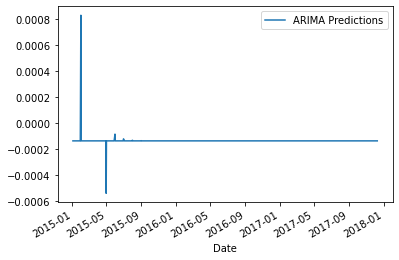

In [36]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred)
pred.index = df_oil.index[start:end+1]
pred.plot(legend=True)


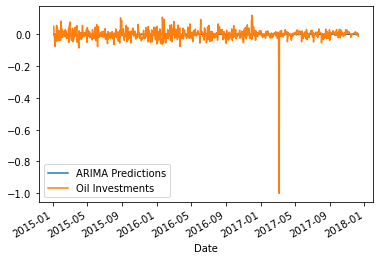

In [37]:
pred.plot(legend=True)
test['Oil Investments'].plot(legend = True)

# Gold

In [38]:
df_gold = df[['Gold Investments']]
df_gold.head()

,Gold Investments
Date,
2009-12-31,0.000150
2010-04-01,0.001097
2010-05-01,0.001560
2010-06-01,0.006009
2010-07-01,0.000221


In [39]:
df_gold.isnull().sum()

Gold Investments    0
dtype: int64

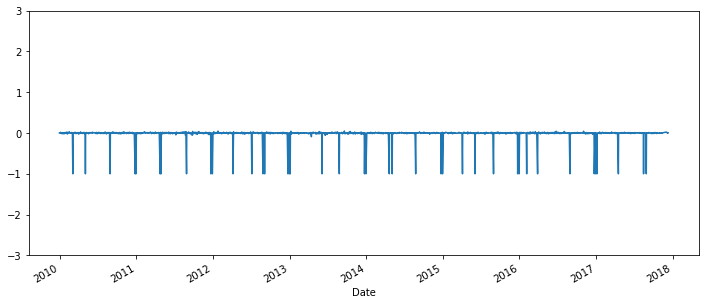

In [40]:
plt.ylim(-3,3)
df_gold['Gold Investments'].plot(figsize=(12,5))

In [41]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df_gold['Gold Investments'])

1. ADF :  -15.906853851669046
2. P-Value :  8.208405770369125e-29
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression: 1976
5. Critical Values :
	 1% :  -3.4336636717018405
	 5% :  -2.8630037919874423
	 10% :  -2.567549261922421


In [42]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_gold['Gold Investments'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2163.777, Time=4.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2140.923, Time=0.42 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2139.983, Time=0.57 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2140.028, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2102.766, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2136.638, Time=3.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2136.827, Time=1.20 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2177.285, Time=4.51 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2155.216, Time=3.48 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-2197.917, Time=2.95 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-2199.568, Time=2.64 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-2201.278, Time=1.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2137.375, Time=0.69 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-2199.625, Time=1.26 sec
 ARIMA(5,0,1)(0,0,0

In [43]:
print(df_gold.shape)
train = df_gold['2009-12-31':'2014-12-31']
test = df_gold['2015-01-01':]
print(train.shape,test.shape)

(1984, 1)
(1259, 1) (725, 1)


In [44]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Gold Investments'],order=(4,0,0))
model=model.fit()
model.summary()

D:\Python\Anaconda2\envs\Virtual\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Python\Anaconda2\envs\Virtual\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       Gold Investments   No. Observations:                 1259
Model:                     ARMA(4, 0)   Log Likelihood                 696.127
Method:                       css-mle   S.D. of innovations              0.139
Date:                Mon, 19 Oct 2020   AIC                          -1380.255
Time:                        11:23:06   BIC                          -1349.426
Sample:                             0   HQIC                         -1368.669
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0208      0.005     -4.393      0.000      -0.030      -0.012
ar.L1.Gold Investments    -0.0215      0.028     -0.769      0.442      -0.076       0.033
ar.L2.Gold Investments    -0.0167      0.028     -0.595      0.552      -0.072       0.038
ar.L3.Gold Investments    -0.0095      0.028     -0.339      0.735      -0.064       0.045
ar.L4.Gold Investments     0.2196      0.028      7.843      0.000       0.165       0.274
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4515           -0.0000j            1.4515           -0.5000
AR.2           -0.0009           -1.4479j            1.4479           -0.2501
AR.3           -0.0009           +1.4479j            1.4479            0.2501
AR.4            1.4965           -0.0000j            1.4965           -0.0000
-----------------------------------------------------------------------------
"""

1259    0.004040
1260   -0.000809
1261   -0.003975
1262   -0.236737
1263   -0.011159
          ...   
1979   -0.020795
1980   -0.020795
1981   -0.020795
1982   -0.020795
1983   -0.020795
Name: ARIMA Predictions, Length: 725, dtype: float64


D:\Python\Anaconda2\envs\Virtual\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


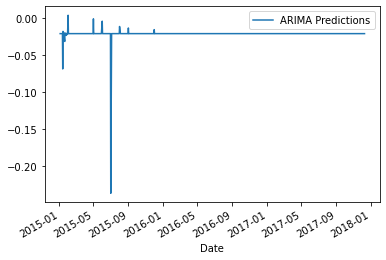

In [45]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred)
pred.index = df_oil.index[start:end+1]
pred.plot(legend=True)


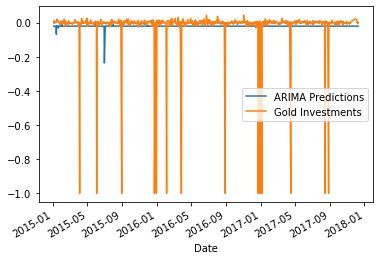

In [46]:
pred.plot(legend=True)
test['Gold Investments'].plot(legend = True)

# Company Stock

In [47]:
df_com = df[['Comp Stock']]
df_com.head()

,Comp Stock
Date,
2009-12-31,0.017354
2010-04-01,0.015565
2010-05-01,0.001729
2010-06-01,-0.015906
2010-07-01,-0.001849


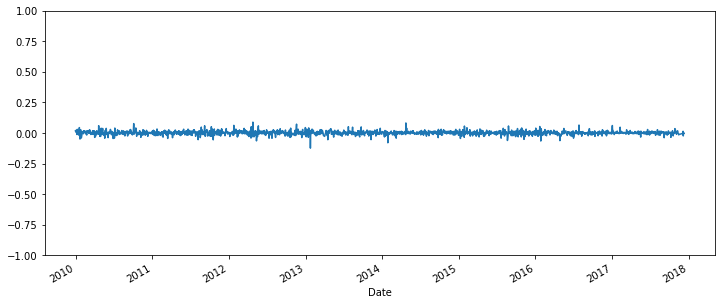

In [48]:
plt.ylim(-1,1)
df_com['Comp Stock'].plot(figsize=(12,5))

In [49]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df_com['Comp Stock'])

1. ADF :  -12.473386265908234
2. P-Value :  3.207774293089997e-23
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1971
5. Critical Values :
	 1% :  -3.4336720887549483
	 5% :  -2.863007508094813
	 10% :  -2.567551240570721


In [50]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [51]:
adfuller_test(df_com['Comp Stock'])

ADF Test Statistic : -12.473386265908234
p-value : 3.207774293089997e-23
#Lags Used : 12
Number of Observations Used : 1971
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [52]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_com['Comp Stock'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-10770.599, Time=4.77 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-10770.859, Time=0.51 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-10770.002, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-10770.006, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-10765.025, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-10767.932, Time=1.90 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 8.551 seconds


In [53]:
print(df_com.shape)
train = df_com['2009-12-31':'2014-12-31']
test = df_com['2015-01-01':]
print(train.shape,test.shape)

(1984, 1)
(1259, 1) (725, 1)


In [59]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Comp Stock'],order=(1,0,1))
model=model.fit()
model.summary()

D:\Python\Anaconda2\envs\Virtual\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Python\Anaconda2\envs\Virtual\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Comp Stock   No. Observations:                 1259
Model:                     ARMA(1, 1)   Log Likelihood                3359.745
Method:                       css-mle   S.D. of innovations              0.017
Date:                Mon, 19 Oct 2020   AIC                          -6711.490
Time:                        11:26:09   BIC                          -6690.938
Sample:                             0   HQIC                         -6703.766
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0012      0.000      2.446      0.014       0.000       0.002
ar.L1.Comp Stock     0.1430      0.605      0.237      0.813      -1.042       1.328
ma.L1.Comp Stock    -0.1204      0.606     -0.199      0.843      -1.308       1.067
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            6.9912           +0.0000j            6.9912            0.0000
MA.1            8.3085           +0.0000j            8.3085            0.0000
-----------------------------------------------------------------------------
"""

1259    0.000692
1260    0.001116
1261    0.001177
1262    0.001186
1263    0.001187
          ...   
1979    0.001187
1980    0.001187
1981    0.001187
1982    0.001187
1983    0.001187
Name: ARIMA Predictions, Length: 725, dtype: float64


D:\Python\Anaconda2\envs\Virtual\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


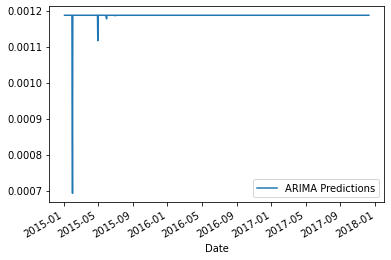

In [60]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred)
pred.index = df_oil.index[start:end+1]
pred.plot(legend=True)

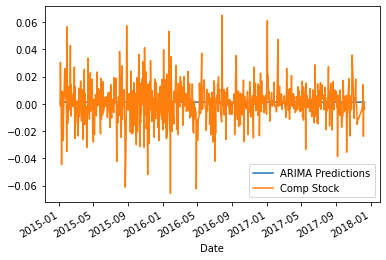

In [61]:
pred.plot(legend=True)
test['Comp Stock'].plot(legend = True)